In [149]:
import h5py    
import numpy as np
import matplotlib.pyplot as plt 

train_data = h5py.File("fracture_train_data.h5", 'r')

print(train_data)
print(train_data.keys())


<HDF5 file "fracture_train_data.h5" (mode r)>
<KeysViewHDF5 ['data_index', 'density_train0', 'train_images0', 'train_images1', 'train_labels0']>


In [150]:
dataindex = np.array(train_data["data_index"])

density = np.array(train_data["density_train0"])

images0 = np.array(train_data["train_images0"])

images1 = np.array(train_data["train_images1"])

labels0 = np.array(train_data["train_labels0"])

In [169]:
im0 = np.reshape(images0, (11136,125,300,1))
im0 = im0.astype('float32') / 255

im1 = np.reshape(images1, (11136,125,300,1))
im1 = im1.astype('float32') / 255


<class 'numpy.ndarray'>


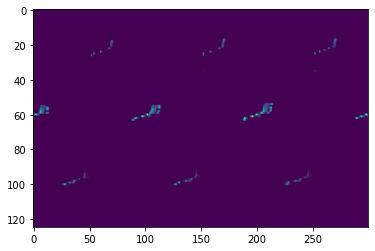

In [170]:
plt.imshow(im0[2780], aspect='auto')

In [153]:
print(labels0[0])
print(type(labels0))

0.19856459330143542
<class 'numpy.ndarray'>


In [172]:
import sklearn
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import math
import scipy


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(im0, labels0, test_size = 0.20, random_state = 33) # shuffle m into learning and validation set.

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
#Y_train = y_train.reshape((1, y_train.shape[0]))
#Y_test = y_test.reshape((1, y_test.shape[0]))

In [175]:
print(Y_train.shape)
print(X_train.shape)

(8908, 1)
(8908, 125, 300, 1)


In [176]:
#Reshape Data

Y_train = Y_train.T
Y_test = Y_test.T

print(Y_train.shape)


(1, 8908)


In [177]:
print(Y_train.shape)
print(X_train.shape)

(1, 8908)
(8908, 125, 300, 1)


In [178]:
unique_labels = np.unique(Y_train)
print(unique_labels)
new_y = []

for i in Y_train:
	new_y.append(np.flatnonzero(i == unique_labels)[0])
print(y_train[0:10],new_y[0:10])
new_y = np.array(new_y)

[1.]
[0.10885167 0.19856459 0.07296651 0.07894737 0.05502392 0.0076555
 0.10885167 0.10287081 0.09090909 0.01913876] [0]


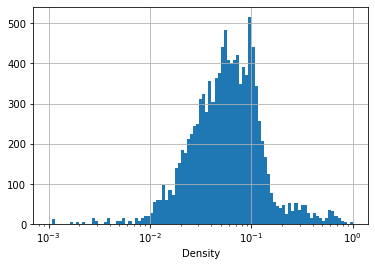

In [159]:
x = np.linspace(-3,0,100)

plt.hist(density, bins=10**x)
plt.xlabel('Density')
plt.xscale("log")
plt.grid("True")


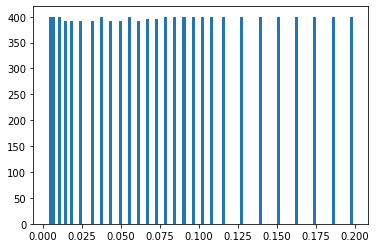

In [160]:
plt.hist(labels0, bins=100);

In [161]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dropout
from tensorflow.keras.layers import BatchNormalization

In [179]:
len(set(labels0))
#print(np.unique(labels0))
from keras.utils import to_categorical

Y_binary = to_categorical(new_y, num_classes = 28)

print(Y_train[3:])

print(Y_binary[3:])



[]
[]


In [180]:

model = keras.models.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', input_shape = (125,300,1),activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding= 'same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(32, activation= 'relu'))
model.add(Dropout(0.4))
model.add(Dense(28, activation= 'softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 125, 300, 32)      320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 62, 150, 32)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 62, 150, 32)       9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 31, 75, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 74400)             0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                2380832   
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)              

In [195]:
opt = keras.optimizers.Nadam(beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [196]:
history=model.fit(X_train, Y_train.T, epochs=5, validation_split=.1)

Train on 8017 samples, validate on 891 samples
Epoch 1/5
2080/8017 [======>.......................] - ETA: 2:07 - loss: 8.1609e-08 - accuracy: 1.0000

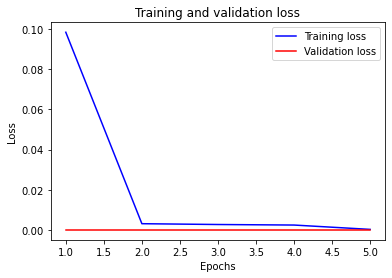

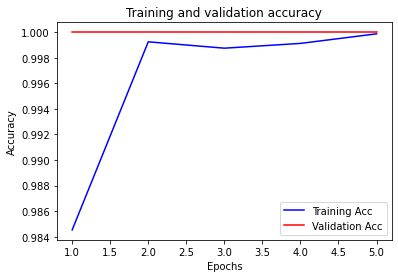

In [184]:
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [188]:
test_loss, test_acc = model.evaluate(X_test,Y_test.T)
print(test_acc);

2228/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [189]:
Y_pred = (model.predict(X_test))
print(Y_pred[0],Y_test[0])

[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.0902087e-38 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.6500002e-38 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00] [1. 1. 1. ... 1. 1. 1.]
